 # Introducción

Los algoritmos genéticos funcionan iterando sobre generaciones de poblaciones y evaluando qué tan bien estas poblaciones resuelven un problema. Al final de la generación, se seleccionan las mejores personas para producir la próxima generación [1].

## Abejas vs Pesticidas
 
El uso excesivo de agroquímicos en los campos está comprometiendo el futuro de las abejas, desencadenando consecuencias que pueden ir más allá de los aspectos ambientales pues estos insectos polinizan los principales cultivos del mundo. Se estima que el 75 por ciento de la alimentación humana depende directa o indirectamente de la acción de los insectos polinizadores.

### Conceptualización

Un pesticida es un compuesto químico que tiene la importancia para el control de plagas en la agricultura. Debido a lo anterior los pesticidas no solamente matan plagas de insectos que afectan los cultivos, sino que también poblaciones de abejas melíferas, las cuales benefician el medio ambiente.

Las abejas son los mayores polinizadores de muchas plantas silvestres y monocultivo. Motivo por el cual, su población es fundamental para la productividad agrícola mundial y es evidente que las alteraciones en sus poblaciones podrían derivar en significativas pérdidas económicas.

La situación actual de las abejas es preocupante, debido a que el censo poblacional ha disminuido drásticamente por el uso extensivo de pesticidas en monocultivos tecnificados que buscan potenciar el rendimiento de la producción.

Los pesticidas son sustancias producidas de forma natural o industrial para destruir organismos potencialmente perjudiciales para las plantas cultivadas y/o animales de producción. Así mismo, se clasifican de acuerdo con el tipo de peste que controlan en: insecticidas (contra insectos), herbicidas (flora arvense), rodenticidas (roedores), bactericidas (bacterias), fungicidas (hongos) y larvicidas (larvas).

Estas sustancias pueden ser tóxicas a su vez para las especies que comparten el sitio de fumigación y, dependiendo de la dosificación, pueden tener una acción letal o subletal; a la par, permanecer residualmente en el medio ambiente.

### Planteamiento

Con base a lo anterior un pesticida contempla tres propiedades inherentes, las cuales son composición, forma de aplicación y residualidad:

**Composición:** Está compuesto por varios químicos incluyendo un ingrediente activo que es el químico que mata, controla o repele plagas.

**Aplicación:** Las formas de aplicación de los pesticidas con sus respectivas características, son espolvoreo, pulverización, fumigación, aplicación de cebos, tratamientos vía riego y aplicación en el suelo.

**Residuality:** La residualidad del pesticida es un resultado de diversos factores, como la forma y sitio de aplicación, dosis, grado de infestación de la plaga y nivel de control o riesgo, exposición a microorganismos y materia orgánica.

Teniendo en cuenta estas tres características de los pesticidas, se desea saber cómo deben combinarse estas tres características y así minimizar la tasa de mortalidad de las poblaciones de abejas melíferas. Para llegar a este resultado hay que tener presente que:

* El porcentaje de ingrediente activo en el compuesto puede ser variable
* Grado de toxicidad del ingrediente activo: De baja peligrosidad, nocivos, toxico, muy tóxicos
* Otros efectos: Corrosivos, irritantes, fácilmente inflamables y explosivos
* La forma de aplicación puede ser cualquiera
* La residualidad  depende de las condiciones de la aplicación.

La idea es que el modelo se pueda aplicar para cualquier combinación de cultivo-plaga


# Importaciones

In [9]:
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt

# Representación de los datos

Clases para representar los datos del individuo para resolver el problema de las Abejas vs Pesticidas:

In [13]:
class Ingredient:
    def __init__(self, name = None, toxicity = None, effects = []):
        self.name = name
        self.toxicity = toxicity
        self.effects = effects

    def __repr__(self):
        return "(" + str(self.name) + ")"

class Application:
    def __init__(self, name = None, scope_application = None):
        self.name = name
        self.scope_application = scope_application

    def __repr__(self):
        return "(" + str(self.name) + ")"

class Residuality:
    def __init__(self, name = None, period = None):
        self.name = name
        self.period = period

    def __repr__(self):
        return "(" + str(self.name) + ")"

class Compuesto:
    def __init__(self, concentration, name, ingredient = Ingredient(), application = Application(), residuality = Residuality()):
        self.name = name
        self.concentration = concentration
        self.ingredient = ingredient
        self.application = application
        self.residuality = residuality

    def __repr__(self):
        return "(" + str(self.name) + ")"    

# ¿Cómo funciona el algoritmo?

## Individuo

Para este problema específico, el individuo es un compuesto que contiene un ingrediente activo con x concetración, un grado de toxicidad un otros efectos, una forma de aplicación y un periodo de residualidad.

## Fitness
Para este caso, la aptitud de un individuo es la suma de la distancia para cada par de ciudades consecutivas, incluida la suma de la última ciudad de la secuencia y la primera (porque TSP forma un bucle).
>$Fitness=[\sum_{i=1}^{N-1} Distance(City_{i},City_{i+1})]+Distance(City_{N},City_{1})$

Esta función de "Distance" es solo la distancia euclidiana entre cada ciudad.

In [3]:
#Create a fitness function

class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

## Mutación y reproducción
El algoritmo crea las próximas generaciones utilizando dos métodos, ya sea mutando individuos individuales según una probabilidad, o "apareando" dos individuos para crear uno nuevo. Aquí definimos todas las funciones necesarias para realizar el algoritmo.

In [4]:
#Create our initial population
#Route generator
#This method randomizes the order of the cities, this mean that this method creates a random individual.
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route


#Create first "population" (list of routes)
#This method created a random population of the specified size.

def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population


#Create the genetic algorithm
#Rank individuals
#This function takes a population and orders it in descending order using the fitness of each individual
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    sorted_results=sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)
    return sorted_results



#Create a selection function that will be used to make the list of parent routes

def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults



#Create mating pool

def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool




#Create a crossover function for two parents to create one child
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        

    childP2 = [item for item in parent2 if item not in childP1]
    print(startGene, endGene)

    print(parent1)
    print(parent2)

    print(childP1)
    print(childP2)
    child = childP1 + childP2

    print(child)
    return child

#Create function to run crossover over full mating pool

def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children




#Create function to mutate a single route
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual



#Create function to run mutation over entire population

def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop



#Put all steps together to create the next generation

def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

## El algoritmo genético
Con todas estas funciones definidas, solo queda escribir la definición del algoritmo genético.

In [5]:
#Final step: create the genetic algorithm

def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = [1 / rankRoutes(pop)[0][1]]
    print("Initial distance: " + str(progress[0]))
    
    for i in range(1, generations+1):
        
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
        if i%50==0:
          print('Generation '+str(i),"Distance: ",progress[i])
        
        
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.title('Best Fitness vs Generation')
    plt.tight_layout()
    plt.show()

    
    
    return bestRoute

## Pruebas
Hemos creado una lista de ciudades y ejecutamos el algoritmo, esto debería devolver la mejor ruta encontrada en la última generación.

Initial distance: 15957.000000000002
1 4
[(0), (4), (1), (2), (3)]
[(2), (1), (4), (0), (3)]
[(4), (1), (2)]
[(0), (3)]
[(4), (1), (2), (0), (3)]
4 4
[(4), (0), (3), (2), (1)]
[(1), (2), (3), (4), (0)]
[]
[(1), (2), (3), (4), (0)]
[(1), (2), (3), (4), (0)]
2 4
[(3), (2), (4), (1), (0)]
[(1), (4), (0), (2), (3)]
[(4), (1)]
[(0), (2), (3)]
[(4), (1), (0), (2), (3)]
3 4
[(1), (4), (0), (2), (3)]
[(3), (2), (4), (1), (0)]
[(2)]
[(3), (4), (1), (0)]
[(2), (3), (4), (1), (0)]
0 1
[(2), (0), (4), (3), (1)]
[(4), (1), (3), (2), (0)]
[(2)]
[(4), (1), (3), (0)]
[(2), (4), (1), (3), (0)]
2 3
[(3), (4), (0), (1), (2)]
[(0), (4), (1), (2), (3)]
[(0)]
[(4), (1), (2), (3)]
[(0), (4), (1), (2), (3)]
2 3
[(1), (4), (2), (0), (3)]
[(0), (3), (1), (4), (2)]
[(2)]
[(0), (3), (1), (4)]
[(2), (0), (3), (1), (4)]
1 2
[(4), (1), (2), (0), (3)]
[(4), (3), (2), (0), (1)]
[(1)]
[(4), (3), (2), (0)]
[(1), (4), (3), (2), (0)]
0 2
[(4), (0), (3), (2), (1)]
[(3), (1), (2), (4), (0)]
[(4), (0)]
[(3), (1), (2)]
[(4), 

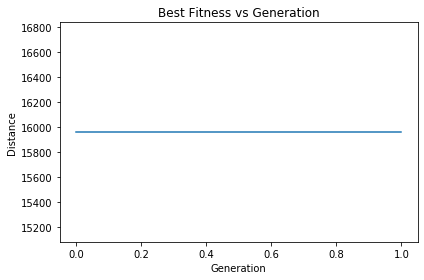

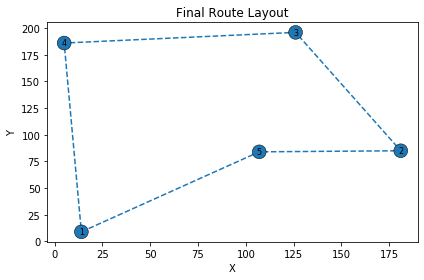

In [6]:
#Running the genetic algorithm
#Create list of cities

cityList = []

for i in range(0,5):
    cityList.append(City(name = i, x=int(random.random() * 200), y=int(random.random() * 200)))


best_route=geneticAlgorithm(population=cityList, popSize=30, eliteSize=20, mutationRate=0.01, generations=1)
x=[]
y=[]
for i in best_route:
  x.append(i.x)
  y.append(i.y)
x.append(best_route[0].x)
y.append(best_route[0].y)
plt.plot(x, y, '--o')
plt.xlabel('X')
plt.ylabel('Y')
ax=plt.gca()
plt.title('Final Route Layout')
bbox_props = dict(boxstyle="circle,pad=0.3", fc='C0', ec="black", lw=0.5)
for i in range(1,len(cityList)+1):
  ax.text(cityList[i-1].x, cityList[i-1].y, str(i), ha="center", va="center",
            size=8,
            bbox=bbox_props)
plt.tight_layout()
plt.show()

## Bibliografía

[1] [Uso indiscriminado de pesticidas amenaza a las abejas](https://www.scidev.net/america-latina/medio-ambiente/especial/uso-indiscriminado-de-pesticidas-amenaza-a-las-abejas.html)


